In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import json
import os
import cv2
import time
import numpy as np
from csbdeep.utils import Path, normalize
import pandas as pd
import anndata as ad
from tqdm import tqdm
import pickle
import sys
sys.path.append("/data_nfs/je30bery/ALS_MELC_Data_Analysis/segmentation/")
sys.path.append("/data_nfs/je30bery/ALS_MELC_Data_Analysis/marker_expression/")
sys.path.append("/data/bionets/je30bery/ALS_MELC_Data_Analysis/segmentation/")
sys.path.append("/data/bionets/je30bery/ALS_MELC_Data_Analysis/marker_expression/")
from melc_segmentation import MELC_Segmentation
from initial_analysis import ExpressionAnalyzer
import anndata as ad
import warnings
warnings.filterwarnings("ignore")

2023-12-20 12:15:57.098345: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 12:15:57.144016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 12:15:57.896843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


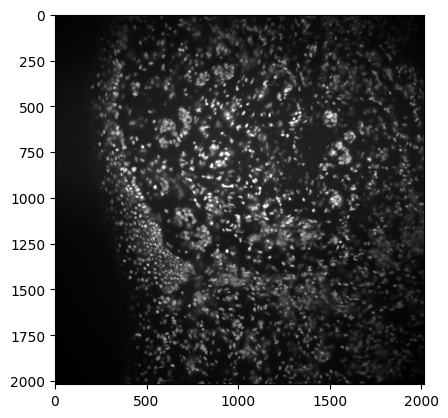

In [3]:
plt.imshow(cv2.imread("/data_nfs/datasets/melc/melanoma/processed/Melanoma_36_202009111023_3/bleach/21100_Propidium iodide_500_090.tif"))

In [4]:
seg = MELC_Segmentation("/data_nfs/datasets/melc/melanoma/processed/", membrane_markers=None)

In [7]:
seg.field_of_view = "Melanoma_36_202009111023_3"

In [8]:
res = seg.run(radii_ratio=2)

Found model '2D_versatile_fluo' for 'StarDist2D'.


2023-12-08 13:19:35.517241: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


100%|██████████████████████████████████████████████████████████████| 3308/3308 [01:09<00:00, 47.74it/s]


In [38]:
img = cv2.imread("/data_nfs/datasets/melc/melanoma/processed/Melanoma_36_202009111023_3/bleach/21100_Propidium iodide_500_090.tif", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("21100_Propidium iodide_500_090.tif", img)

True

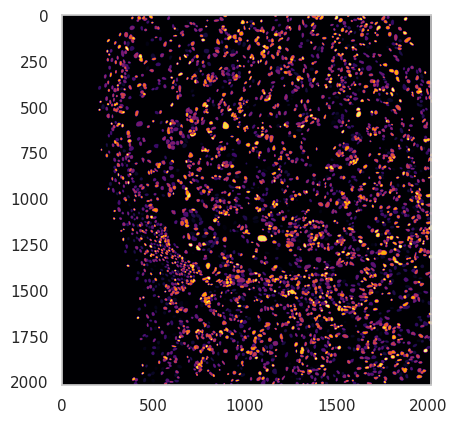

In [40]:
sns.set_style("whitegrid", {'axes.grid' : False})

plt.clf()
plt.imshow(res[0], cmap="inferno")
plt.savefig("nuclei.pdf")

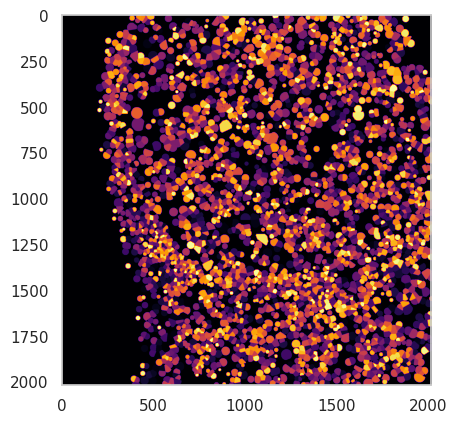

In [41]:
plt.imshow(res[1], cmap="inferno")
plt.savefig("cell.pdf")